In [ ]:
transform = transforms.Compose([transforms.ToTensor()]) #transforms.Resize(255), transforms.CenterCrop(224),

In [ ]:
path=r'./Juventus/Home/'
dataset = torchvision.datasets.ImageFolder(path,transform=transform)
dataset.samples[0:397]

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torchvision.utils import save_image
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt

import random
import helper
import os
import glob
from pathlib import Path
%matplotlib inline

C:\Users\Aymen\.conda\envs\p36workshop\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: [WinError 126] Le module spécifié est introuvable
  warn(f"Failed to load image Python extension: {e}")


In [63]:
Results = pd.read_csv("Results.csv")
Results=Results[["wyId","gameweek","label","Home","Away","Home Score","Away Score"]]
Results.head(2)
#invasion_index
#acceleration_index

,wyId,gameweek,label,Home,Away,Home Score,Away Score
0,2576335,38,"Lazio - Internazionale, 2 - 3",Lazio,Internazionale,2,3
1,2576336,38,"Sassuolo - Roma, 0 - 1",Sassuolo,Roma,0,1


In [4]:
# device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [5]:
os.listdir("./")

['.ipynb_checkpoints',
 'Atalanta',
 'Benevento',
 'Bologna',
 'Cagliari',
 'Chievo',
 'Crotone',
 'Fiorentina',
 'Genoa',
 'Hellas Verona',
 'Internazionale',
 'Juventus',
 'Lazio',
 'Milan',
 'Models.ipynb',
 'Napoli',
 'Results.csv',
 'Roma',
 'Sampdoria',
 'Sassuolo',
 'SPAL',
 'Torino',
 'Udinese']

In [37]:
path_str=r'.\Juventus\Home'
os.listdir(path_str)

['2575964',
 '2575985',
 '2576005',
 '2576014',
 '2576035',
 '2576056',
 '2576076',
 '2576094',
 '2576112',
 '2576132',
 '2576163',
 '2576186',
 '2576209',
 '2576238',
 '2576252',
 '2576275',
 '2576295',
 '2576311',
 '2576334']

In [52]:
for img_name in os.listdir(path_str):# defining the image path
    aux=[str(x) for x in path.glob('*'+str(img_name)+'*\\*.png')]
    break

.\Juventus\Home\2575964\
['Juventus\\Home\\2575964\\Duel H1.png', 'Juventus\\Home\\2575964\\Duel H2.png', 'Juventus\\Home\\2575964\\Foul H1.png', 'Juventus\\Home\\2575964\\Foul H2.png', 'Juventus\\Home\\2575964\\Free Kick H1.png', 'Juventus\\Home\\2575964\\Free Kick H2.png', 'Juventus\\Home\\2575964\\Interruption H1.png', 'Juventus\\Home\\2575964\\Interruption H2.png', 'Juventus\\Home\\2575964\\Others on the ball H1.png', 'Juventus\\Home\\2575964\\Others on the ball H2.png', 'Juventus\\Home\\2575964\\Pass H1.png', 'Juventus\\Home\\2575964\\Pass H2.png', 'Juventus\\Home\\2575964\\Save attempt H1.png', 'Juventus\\Home\\2575964\\Save attempt H2.png', 'Juventus\\Home\\2575964\\Shot H1.png', 'Juventus\\Home\\2575964\\Shot H2.png']


In [59]:
path_str=r'.\Juventus\Home'
transform = transforms.Compose([transforms.ToTensor()])
Results = pd.read_csv("Results.csv")
Results=Results[["wyId","gameweek","label","Home","Away","Home Score","Away Score"]]
D_images=dict()    #ID---> images
D_paths=dict()     #ID--->paths
D_labels=dict()    #ID--->label
D_NHeatmaps=dict() #ID---->n_heatmaps

aux=list()
for i in range(len(os.listdir(path_str))):
    path=Path(path_str+"/"+os.listdir(path_str)[i])
    D_NHeatmaps[os.listdir(path_str)[i]]=sum(1 for x in path.glob('*') if x.is_file())-5
    path=Path('.\Juventus\Home')
    dataset = torchvision.datasets.ImageFolder(path_str,transform=transform)
    pngCounter = sum(1 for x in path.glob('**/*.png') if x.is_file()) 
    print(pngCounter)
    path_list=list()
    #dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False)
    for tu in range(pngCounter):
        #image= next(iter(dataloader))
        for index in range(len(Results[Results["Home"]=="Juventus"][["Home Score","Away Score"]].values)):
            for ID in D_NHeatmaps.keys():
                if ((str(Results[Results["Home"]=="Juventus"][["wyId"]].values[index][0])==ID) and (tu%D_NHeatmaps[ID]==0)and(tu>0)):
                    Result,id_match,TeamName=Results[Results["Home"]=="Juventus"][["Home Score","Away Score"]].values[index][0:2],Results[Results["Home"]=="Juventus"][["wyId"]].values[index][0],Results[Results["Home"]=="Juventus"][["Home"]].values[index][0]#Result,id_match,TeamName
                    D_labels[str(id_match)]=list(Result)
                    for img_name in os.listdir(path_str):# defining the image path
                        path_list=[str(x) for x in path.glob('*'+str(img_name)+'*\\*.png')]
                        D_paths[str(id_match)]=path_list 
                        for i in D_paths.values():
                            for im in i:
                                img = PIL.Image.open(im)
                                img = np.array(img)/255.
                                img =torch.tensor(img)
                                print(img.shape)
                                L_images.append(img)
                        path_list.clear()
                        D_images[str(id_match)]=L_images
        break

302
302
302
302
302
302
302
302
302
302
302
302
302
302
302
302
302
302
302


In [60]:
D_images

{}

In [15]:
import PIL
L_images=list()
for i in D_images.values():
    for im in i:
        img = PIL.Image.open(im)
        img = np.array(img)/255.
        img =torch.tensor(img)
        print(img.shape)
        L_images.append(img)
        break
    break

torch.Size([480, 672, 4])


In [46]:
!conda update pytorch torchvision


PackageNotInstalledError: Package is not installed in prefix.
  prefix: C:\ProgramData\Anaconda3
  package name: pytorch




In [61]:
class SoccerDataset():#['Atalanta','Benevento','Bologna','Cagliari','Chievo','Crotone','Fiorentina','Genoa','Hellas Verona','Internazionale','Juventus','Lazio','Milan','Napoli','Roma','Sampdoria','Sassuolo','SPAL','Torino','Udinese']
    def __init__(self,team_name="Juventus",Verbose=False,transform = transforms.Compose([transforms.ToTensor()])):
        #attributes
        self.path_str=r'.\Juventus\Home'
               # self.x = D_images
               # self.y = D_labels
               # self.n_samples = pngCounter
        self.transform=transform
               #self.dataloader
        # data loading
        Results = pd.read_csv("Results.csv")
        Results=Results[["wyId","gameweek","label","Home","Away","Home Score","Away Score"]]
        D_images=dict() #ID--->images
        D_labels=dict() #ID--->label
        D_NHeatmaps=dict() #ID---->n_heatmaps
        for i in range(len(os.listdir(self.path_str))):
            path=Path(self.path_str+"/"+os.listdir(self.path_str)[i])
            D_NHeatmaps[os.listdir(self.path_str)[i]]=sum(1 for x in path.glob('*') if x.is_file())-5
        L_match=list()
        path=Path('.\Juventus\Home')
        dataset = torchvision.datasets.ImageFolder(self.path_str,transform=self.transform)
        pngCounter = sum(1 for x in path.glob('**/*.png') if x.is_file()) 
        print(pngCounter)
        self.dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False)
        for tu in range(pngCounter):
            image= next(iter(self.dataloader))
            L_match.append(image)
            for index in range(len(Results[Results["Home"]=="Juventus"][["Home Score","Away Score"]].values)):
                for ID in D_NHeatmaps.keys():
                    if ((str(Results[Results["Home"]=="Juventus"][["wyId"]].values[index][0])==ID) and (tu%D_NHeatmaps[ID]==0)and(tu>0)):
                        Result,id_match,TeamName=Results[Results["Home"]=="Juventus"][["Home Score","Away Score"]].values[index][0:2],Results[Results["Home"]=="Juventus"][["wyId"]].values[index][0],Results[Results["Home"]=="Juventus"][["Home"]].values[index][0]#Result,id_match,TeamName
                        D_labels[str(id_match)]=list(Result)
                        D_images[str(id_match)]=L_match 
                        L_match.clear()
        self.x = D_images
        self.y = D_labels
        self.z = D_NHeatmaps
        self.n_samples = pngCounter
    def __getitem__(self, ID):
        path = self.path_str
        preds = self.x[str(ID)]
        trgts = self.y[str(ID)]
        sample = { 
            'predictors' : preds,
            'targets' : trgts,
            'path': path,
          }
        return preds,trgts


    def __len__(self):
        # len(dataset)
        return self.n_samples

In [62]:
Foot=SoccerDataset()

302


In [81]:
first_data = Foot[2575964]
features, labels = first_data
print(features[0][0], labels)

tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]]) [3, 0]


In [38]:
for i in Foot.x.values():
    print(i[0][0][0,:,:,:].shape)
    transform = transforms.ToPILImage()
    img = transform(i[0][0][0,:,:,:])
    img. show()
    break

NameError: name 'Foot' is not defined

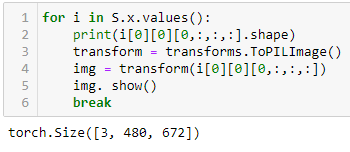

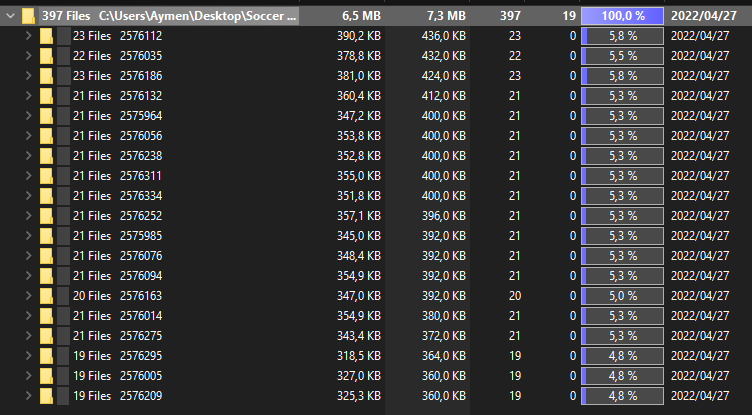

In [83]:
#os.chdir(str(r'C:\Users\Aymen\Desktop\Soccer Heatmaps\Italy'))
os.getcwd() # Get working directory 

'C:\\Users\\Aymen\\Desktop\\Soccer Heatmaps\\Italy'

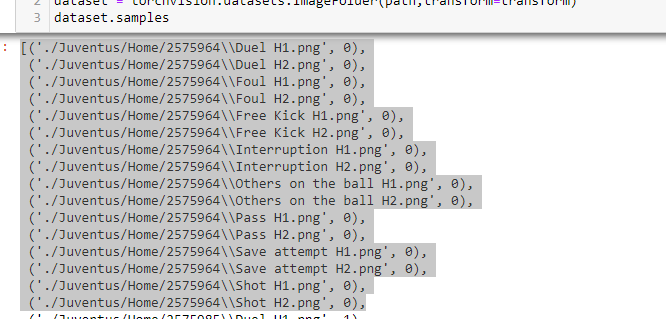

### Modélisation:

In [12]:
# import the necessary packages
from torch.nn import Module
from torch.nn import Conv3d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten


%matplotlib.use("Agg")
# import the necessary packages
from pyimagesearch.lenet import LeNet
from sklearn.metrics import classification_report
from torch.utils.data import random_split
from torchvision.transforms import ToTensor
from torchvision.datasets import KMNIST
from torch.optim import Adam

import argparse
import time

UsageError: Line magic function `%matplotlib.use("Agg")` not found.


In [73]:
for i in S.x.values():
    print(i[0][0][0,:,:,:].shape)
    transform = transforms.ToPILImage()
    #img = transform(i[0][0][0,:,:,:])
    #img. show()
    break
numChannels=i[0][0][0,:,:,:].shape[0]
s=list()
for i in S.y.keys():
    s.append(S[i][1])
classes=s
classes

torch.Size([3, 480, 672])


[[0, 1],
 [2, 0],
 [1, 0],
 [1, 0],
 [2, 1],
 [3, 1],
 [3, 0],
 [3, 1],
 [2, 0],
 [1, 0],
 [3, 0],
 [2, 1],
 [4, 1],
 [4, 0],
 [3, 0],
 [3, 0],
 [1, 2],
 [7, 0],
 [0, 0]]

In [20]:
classes= torch.from_numpy(np.array(classes))
classes

tensor([0, 1, 2, 3, 4, 7])

In [24]:
numChannels

3

In [25]:
class ConvNet(nn.Module):
    def __init__(self, numChannels, classes):
        # call the parent constructor
        super(ConvNet, self).__init__()
        # initialize first set of CONV => RELU => POOL layers
        self.conv1 = nn.Conv3d(in_channels=3, out_channels=20,kernel_size=(5, 5))
        
        
        self.relu1 = ReLU()
        
        #BRU
        self.maxpool1 = nn.MaxPool3d(kernel_size=(2, 2), stride=(2, 2))
        
        
        # initialize second set of CONV => RELU => POOL layers
        self.conv2 = nn.Conv3d(in_channels=20, out_channels=50,kernel_size=(5, 5))
        
        self.relu2 = ReLU()
        
        self.maxpool2 = nn.MaxPool3d(kernel_size=(2, 2), stride=(2, 2))
        
        
        # initialize first (and only) set of FC => RELU layers
        self.fc1 = Linear(in_features=322560, out_features=500) #322560=480*672
        self.relu3 = ReLU()
        # initialize our softmax classifier
        self.fc2 = Linear(in_features=500, out_features=2)
        self.logSoftmax = LogSoftmax(dim=1)
        
    
    def forward(self, x):
        # pass the input through our first set of CONV => RELU =>
        # POOL layers
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        # pass the output from the previous layer through the second
        # set of CONV => RELU => POOL layers
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        # flatten the output from the previous layer and pass it
        # through our only set of FC => RELU layers
        x = flatten(x, 1)
        x = self.fc1(x)
        x = self.relu3(x)
        # pass the output to our softmax classifier to get our output
        # predictions
        output= self.fc2(x)
        #output = self.logSoftmax(x)
        # return the output predictions
        return output

In [26]:
model=ConvNet(numChannels,classes)

In [27]:
# define training hyperparameters
INIT_LR = 1e-3
BATCH_SIZE = 64
EPOCHS = 10
# define the train and val splits
TRAIN_SPLIT = 12/19
VAL_SPLIT = 1 - TRAIN_SPLIT

In [72]:
for i in S.x.values():
    print(len(i),type(i))
    print(len(i[0]),type(i[0]))
    print(len(i[0][0]),type(i[0][0]))
    print(len(i[0][0][0,:,:,:]),type(i[0][0][0,:,:,:]))
    print(i[0][0][0,:,:,:].shape)
    break
print(len(S.x.keys()))
c=0
Train=list()
Train_lab=list()
Test=list()
Test_lab=list()

for i in S.x.keys():
    if c<13:
        Train_lab.append(S.y[i])
        Train.append(S.x[i][0][0])
        c=c+1
    else :
        Test_lab.append(S.y[i])
        Test.append(S.x[i][0][0])
        c=c+1
print(len(Train[0]),Train_lab[1])

1 <class 'list'>
2 <class 'list'>
1 <class 'torch.Tensor'>
3 <class 'torch.Tensor'>
torch.Size([3, 480, 672])
19
1 [2, 0]


In [52]:
image= next(iter(S.dataloader))
id(image)

2513646871112

In [50]:
##### load the dataset
print("[INFO] loading the Soccer dataset...")
trainData = list(img2Label.items())
trainLabel=list(S.y.values())
testData =list(img2Label.items()) 
testLabel=list(S.y.values())
# calculate the train/validation split
print("[INFO] generating the train/validation split...")
numTrainSamples = int(len(trainData) * TRAIN_SPLIT)
numValSamples = int(len(trainData) * VAL_SPLIT)
trainData, valData = torch.utils.data.random_split(img2Label.items(),[numTrainSamples, numValSamples],generator=torch.Generator().manual_seed(42))

[INFO] loading the Soccer dataset...


NameError: name 'img2Label' is not defined

In [ ]:
# initialize the train, validation, and test data loaders
trainDataLoader = DataLoader((trainData,trainLabel), shuffle=True,batch_size=BATCH_SIZE)
valDataLoader = DataLoader((valData,tra, batch_size=BATCH_SIZE)
testDataLoader = DataLoader(testData, batch_size=BATCH_SIZE)
# calculate steps per epoch for training and validation set
trainSteps = len(trainDataLoader.dataset)//BATCH_SIZE
valSteps = len(valDataLoader.dataset)//BATCH_SIZE

In [ ]:
# initialize the ConvNet model
print("[INFO] initializing the ConvNet model...")
model = ConvNet(numChannels=3,classes=2).to(device)
# initialize our optimizer and loss function
opt = torch.optim.Adam(model.parameters(), lr=INIT_LR)
lossFn = nn.NLLLoss()
# initialize a dictionary to store training history
H = {"train_loss": [],"train_acc": [],"val_loss": [],"val_acc": []}
# measure how long training is going to take


In [ ]:
import time
print("[INFO] training the network...")
startTime = time.time()
# loop over our epochs
for e in range(0, EPOCHS):
    # set the model in training mode
    model.train()
    # initialize the total training and validation loss
    totalTrainLoss = 0
    totalValLoss = 0
    # initialize the number of correct predictions in the training
    # and validation step
    trainCorrect = 0
    valCorrect = 0
    # loop over the training set
    for (x, y) in trainDataLoader:
        # send the input to the device
        (x, y) = (x.to(device), y.to(device))
        # perform a forward pass and calculate the training loss
        pred = model(x)
        loss = lossFn(pred, y)
        # zero out the gradients, perform the backpropagation step,
        # and update the weights
        opt.zero_grad()
        loss.backward()
        opt.step()
        # add the loss to the total training loss so far and
        # calculate the number of correct predictions
        totalTrainLoss += loss
        trainCorrect += (pred.argmax(1) == y).type(
            torch.float).sum().item()

In [ ]:
### switch off autograd for evaluation
with torch.no_grad():
# set the model in evaluation mode
    model.eval()
    # loop over the validation set
    for (x, y) in valDataLoader:
        # send the input to the device
        (x, y) = (x.to(device), y.to(device))
        # make the predictions and calculate the validation loss
        pred = model(x)
        totalValLoss += lossFn(pred, y)
        # calculate the number of correct predictions
        valCorrect += (pred.argmax(1) == y).type(torch.float).sum().item()

In [ ]:
# calculate the average training and validation loss
avgTrainLoss = totalTrainLoss / trainSteps
avgValLoss = totalValLoss / valSteps
# calculate the training and validation accuracy
trainCorrect = trainCorrect / len(trainDataLoader.dataset)
valCorrect = valCorrect / len(valDataLoader.dataset)
# update our training history
H["train_loss"].append(avgTrainLoss.cpu().detach().numpy())
H["train_acc"].append(trainCorrect)
H["val_loss"].append(avgValLoss.cpu().detach().numpy())
H["val_acc"].append(valCorrect)
# print the model training and validation information
print("[INFO] EPOCH: {}/{}".format(e + 1, EPOCHS))
print("Train loss: {:.6f}, Train accuracy: {:.4f}".format(avgTrainLoss, trainCorrect))
print("Val loss: {:.6f}, Val accuracy: {:.4f}\n".format(avgValLoss, valCorrect))

In [ ]:
# finish measuring how long training took
endTime = time.time()
print("[INFO] total time taken to train the model: {:.2f}s".format(endTime - startTime))
# we can now evaluate the network on the test set
print("[INFO] evaluating network...")
# turn off autograd for testing evaluation
with torch.no_grad():
    # set the model in evaluation mode
    model.eval()
    # initialize a list to store our predictions
    preds = []
    # loop over the test set
    for (x, y) in testDataLoader:
        # send the input to the device
        x = x.to(device)
        # make the predictions and add them to the list
        pred = model(x)
        preds.extend(pred.argmax(axis=1).cpu().numpy())
# generate a classification report
print(classification_report(testData.targets.cpu().numpy(),np.array(preds), target_names=testData.classes))

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(H["train_loss"], label="train_loss")
plt.plot(H["val_loss"], label="val_loss")
plt.plot(H["train_acc"], label="train_acc")
plt.plot(H["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(args["plot"])
# serialize the model to disk
torch.save(model, args["model"])

In [ ]:
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self):
    super(NeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(in_features = 3, out_features = 1)
        self.linear2 = nn.Linear(in_features = 3,out_features = 2)

    def forward(self, x):
        output1 = self.linear1(x)
        output2 = self.linear2(x)
        return output1, output2